# RQ1. TO CHECK THE PERFORMANCE OF GPT IN POLITENESS CLASSIFICATIONS.

It includes three phases:

1. Comparision between benchmark responses and Users
2. Comparision between GPT responses and Users
3. Comparision between benchmark responses and GPT

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix



In [ ]:
df= pd.read_excel("/content/Evaluation_set.xlsx")

In [ ]:
df.head(2)

,Comments,USER-1,USER-2,USER-3,benchmark response,GPT response,GPT_reason
0,"_x000D_\nMahadev,_x000D_\nall tests passed for...",impolite,impolite,polite,polite,polite,"classification: polite, confidence level: 1, r..."
1,\nNagios might be just sending some 8 byte inf...,polite,polite,impolite,polite,polite,"classification: polite, confidence level: 1, r..."


In [ ]:
df.columns

Index(['Comments', 'USER-1', 'USER-2', 'USER-3', 'benchmark response',
       'GPT response', 'GPT_reason'],
      dtype='object')

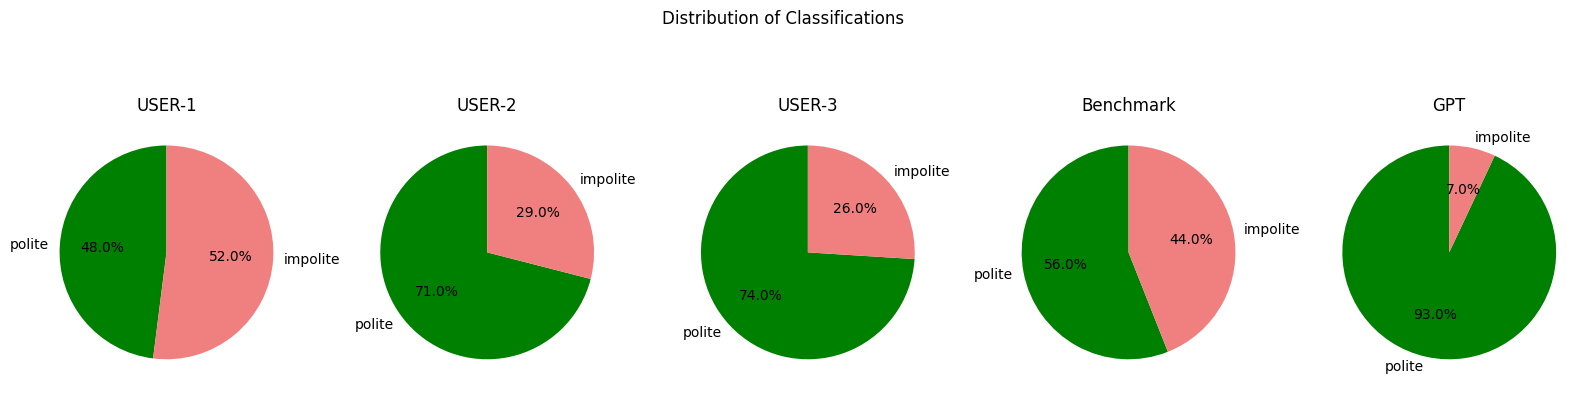

In [ ]:
#Checking all the Distributions of the responses
import matplotlib.pyplot as plt

count_user1 = {'polite': 48, 'impolite': 52}
count_user2 = {'polite': 71, 'impolite': 29}
count_user3 = {'polite': 74, 'impolite': 26}
count_benchmark = {'polite': 56, 'impolite': 44}
count_gpt = {'polite': 93, 'impolite': 7}

# Labels and colors
labels = ['polite', 'impolite']
colors = ['green', 'lightcoral']

# Plotting
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

ax[0].pie(count_user1.values(), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax[0].set_title('USER-1')

ax[1].pie(count_user2.values(), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].set_title('USER-2')

ax[2].pie(count_user3.values(), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax[2].set_title('USER-3')

ax[3].pie(count_benchmark.values(), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax[3].set_title('Benchmark')

ax[4].pie(count_gpt.values(), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax[4].set_title('GPT')

plt.suptitle('Distribution of Classifications')
plt.show()


# *1. COMPARISION BETWEEN BENCHMARK VS USER RESPONSES*



A.Chi-square test:

To check the association between user and benchmark responses. Here, we consider Null hypothesis as the user and benchmark are independent to each other and Alternative hypothesis as the user and benchmark are dependent responses.

In [ ]:
from scipy.stats import chi2_contingency
print("*************Results for chi-square test for user1 and benchmark****************")
contingency_table = pd.crosstab(df['USER-1'], df['benchmark response'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The variables are dependent")
else:
    print("Fail to reject the null hypothesis: The variables are independent")

print("*************Results for chi-square test for user2 and benchmark****************")
contingency_table = pd.crosstab(df['USER-2'], df['benchmark response'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The variables are dependent")
else:
    print("Fail to reject the null hypothesis: The variables are independent")

print("*************Results for chi-square test for user3 and benchmark****************")

contingency_table = pd.crosstab(df['USER-3'], df['benchmark response'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The variables are dependent")
else:
    print("Fail to reject the null hypothesis: The variables are independent")




*************Results for chi-square test for user1 and benchmark****************
Chi-square value: 12.081733370795874
P-value: 0.0005091823601927482
Degrees of freedom: 1
Expected frequencies table: 
[[22.88 29.12]
 [21.12 26.88]]
Reject the null hypothesis: The variables are dependent
*************Results for chi-square test for user2 and benchmark****************
Chi-square value: 0.013324460871813998
P-value: 0.9081030105471107
Degrees of freedom: 1
Expected frequencies table: 
[[12.76 16.24]
 [31.24 39.76]]
Fail to reject the null hypothesis: The variables are independent
*************Results for chi-square test for user3 and benchmark****************
Chi-square value: 5.400764775764777
P-value: 0.020127929819666796
Degrees of freedom: 1
Expected frequencies table: 
[[11.44 14.56]
 [32.56 41.44]]
Reject the null hypothesis: The variables are dependent


B. AGREEMENT RATE - between users and the benchmark

In [ ]:

users = ['USER-1', 'USER-2', 'USER-3']
agreement_rates = {}

for user in users:
    total_comments = len(df)
    matching_labels = len(df[df['benchmark response'] == df[user]])
    agreement_rate = (matching_labels / total_comments) * 100
    agreement_rates[user] = agreement_rate

agreement_rates


{'USER-1': 68.0, 'USER-2': 51.0, 'USER-3': 64.0}

b. Agreement by label

In [ ]:


breakdown_by_label = {}


for user in users:
    breakdown = {}
    for label in ['polite', 'impolite']:
        total_label = len(df[df['benchmark response'] == label])
        matching_label = len(df[(df['benchmark response'] == label) & (df[user] == label)])
        if total_label > 0:
            agreement_rate_label = (matching_label / total_label) * 100
        else:
            agreement_rate_label = 0
        breakdown[label] = agreement_rate_label
    breakdown_by_label[user] = breakdown

breakdown_by_label


{'USER-1': {'polite': 64.28571428571429, 'impolite': 72.72727272727273},
 'USER-2': {'polite': 69.64285714285714, 'impolite': 27.27272727272727},
 'USER-3': {'polite': 83.92857142857143, 'impolite': 38.63636363636363}}

C. Confusion matrix:

To check how well user and benchmark are performing in classfying the labels of the comments.

In [ ]:
print("*************Results for confusion matrix for user1 and benchmark****************")
conf_matrix = confusion_matrix(df['USER-1'], df['benchmark response'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:")
print(conf_matrix_df)
print("*************Results for confusion matrix for user2 and benchmark****************")
conf_matrix = confusion_matrix(df['USER-2'], df['benchmark response'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:")
print(conf_matrix_df)
print("*************Results for confusion matrix for user3 and benchmark****************")
conf_matrix = confusion_matrix(df['USER-3'], df['benchmark response'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:")
print(conf_matrix_df)

*************Results for confusion matrix for user1 and benchmark****************
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  32                  20
Actual Positive                  12                  36
*************Results for confusion matrix for user2 and benchmark****************
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  12                  17
Actual Positive                  32                  39
*************Results for confusion matrix for user3 and benchmark****************
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  17                   9
Actual Positive                  27                  47


D. Visualising the Confusion Matrix

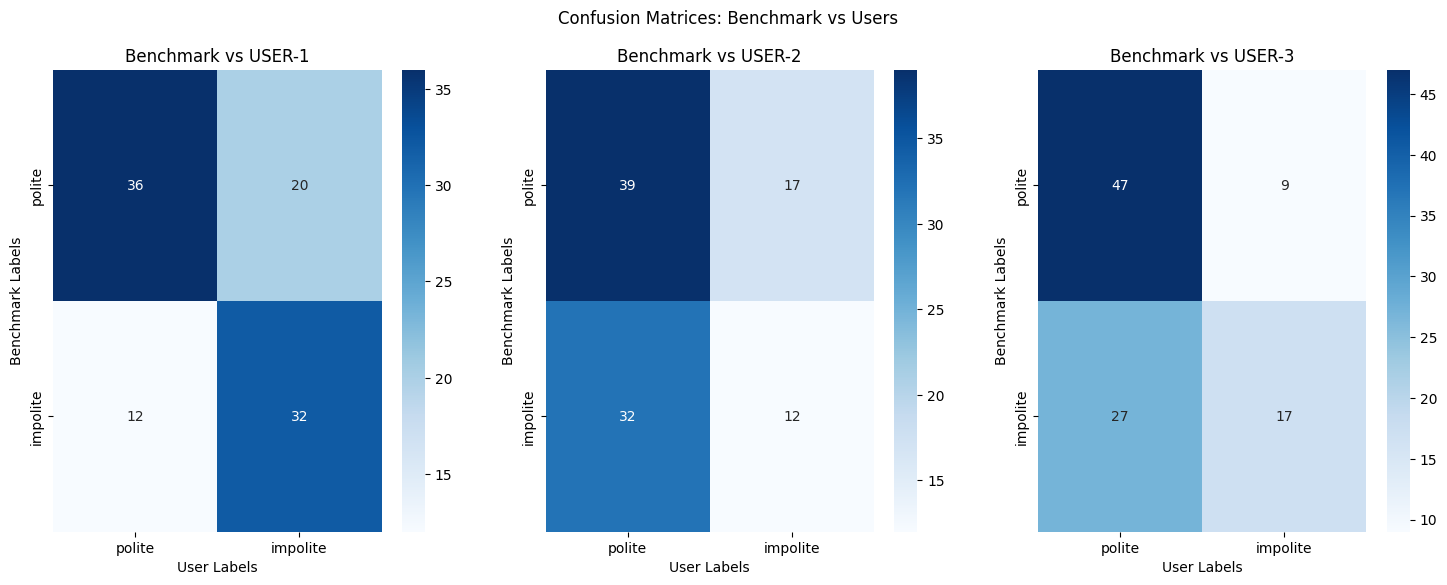

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Confusion Matrices: Benchmark vs Users')


for i, user in enumerate(users):
    cm = confusion_matrix(df['benchmark response'], df[user], labels=['polite', 'impolite'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], xticklabels=['polite', 'impolite'], yticklabels=['polite', 'impolite'])
    axes[i].set_title(f'Benchmark vs {user}')
    axes[i].set_xlabel('User Labels')
    axes[i].set_ylabel('Benchmark Labels')

plt.show()


E. Cohen's Kappa evaluation

In [ ]:
from sklearn.metrics import cohen_kappa_score


kappa_scores = {}

for user in users:
    kappa = cohen_kappa_score(df['benchmark response'], df[user])
    kappa_scores[user] = kappa

kappa_scores


{'USER-1': 0.36305732484076436,
 'USER-2': -0.03201347935973042,
 'USER-3': 0.23599320882852304}

A score of 1 represents perfect agreement.
A score of 0 indicates no agreement (or random chance).
Negative values indicate agreement less than random chance.

F. Performacne Metrics

In [ ]:

provided_metrics = {}


provided_confusion_matrices = {
    'USER-1': {'TN': 32, 'FP': 20, 'FN': 12, 'TP': 36},
    'USER-2': {'TN': 12, 'FP': 17, 'FN': 32, 'TP': 39},
    'USER-3': {'TN': 17, 'FP': 9, 'FN': 27, 'TP': 47}
}

for user, cm in provided_confusion_matrices.items():
    TP = cm['TP']
    TN = cm['TN']
    FP = cm['FP']
    FN = cm['FN']


    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)


    provided_metrics[user] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }


provided_metrics_df = pd.DataFrame(provided_metrics).T
provided_metrics_df


,Accuracy,Precision,Recall,F1 Score
USER-1,0.68,0.642857,0.750000,0.692308
USER-2,0.51,0.696429,0.549296,0.614173
USER-3,0.64,0.839286,0.635135,0.723077


G. Visualising the performance Metrics

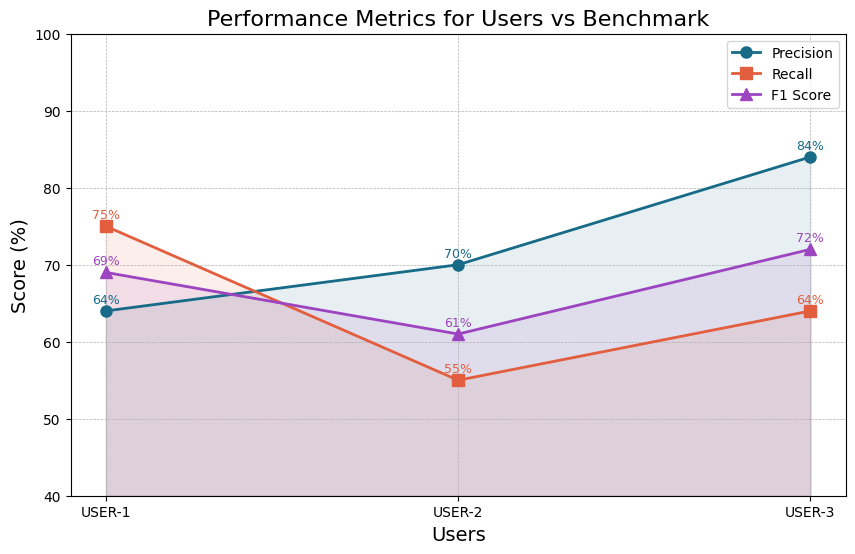

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_metric(ax, x, y, color, marker, label):
    ax.plot(x, y, color=color, marker=marker, linestyle='-', linewidth=2, markersize=8, label=label)
    ax.fill_between(x, y, 40, color=color, alpha=0.1)
    for i, val in enumerate(y):
        ax.annotate(f"{val}%", (x[i], val + 1), fontsize=9, ha='center', color=color)


users = ["USER-1", "USER-2", "USER-3"]
precision = [64, 70, 84]
recall = [75, 55, 64]
f1_score = [69, 61, 72]


colors = ['#176B87', '#E25E3E', '#9D44C0']


fig, ax = plt.subplots(figsize=(10, 6))


plot_metric(ax, users, precision, colors[0], 'o', 'Precision')
plot_metric(ax, users, recall, colors[1], 's', 'Recall')
plot_metric(ax, users, f1_score, colors[2], '^', 'F1 Score')


ax.set_xlabel('Users', fontsize=14)
ax.set_ylabel('Score (%)', fontsize=14)
ax.set_title('Performance Metrics for Users vs Benchmark', fontsize=16)


ax.set_ylim(40, 100)
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()

plt.show()


Conclusion: We have performed Agreement rate, Chi-square test, Cohen;s kappa, Confusion MAtrix and Performacne metrics and we realsied there is variance in agreement and even performacne of benchmark is not reliable when compared to users

# * 2. Comparsion of GPT vs Users *

A. CHI-SQUARE TEST TO CHECK THE AGREEMENT BEWTEEN USERS AND GPT RESPONSES.

In [ ]:
print("*************Results for chi-square test for user1 and GPT****************")

contingency_table = pd.crosstab(df['USER-1'], df['GPT response'])


chi2, p_value, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The variables are dependent")
else:
    print("Fail to reject the null hypothesis: The variables are independent")

print("*************Results for chi-square test for user2 and GPT****************")

contingency_table = pd.crosstab(df['USER-2'], df['GPT response'])


chi2, p_value, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The variables are dependent")
else:
    print("Fail to reject the null hypothesis: The variables are independent")

print("*************Results for chi-square test for user3 and GPT****************")

contingency_table = pd.crosstab(df['USER-3'], df['GPT response'])


chi2, p_value, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies table: \n{expected}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The variables are dependent")
else:
    print("Fail to reject the null hypothesis: The variables are independent")


*************Results for chi-square test for user1 and GPT****************
Chi-square value: 2.129120879120879
P-value: 0.1445236236808745
Degrees of freedom: 1
Expected frequencies table: 
[[ 3.64 48.36]
 [ 3.36 44.64]]
Fail to reject the null hypothesis: The variables are independent
*************Results for chi-square test for user2 and GPT****************
Chi-square value: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies table: 
[[ 2.03 26.97]
 [ 4.97 66.03]]
Fail to reject the null hypothesis: The variables are independent
*************Results for chi-square test for user3 and GPT****************
Chi-square value: 0.36917456272294985
P-value: 0.5434545462791025
Degrees of freedom: 1
Expected frequencies table: 
[[ 1.82 24.18]
 [ 5.18 68.82]]
Fail to reject the null hypothesis: The variables are independent


B. Agreement Rate

In [ ]:


for user in users:
    total_comments = len(df)
    matching_labels = len(df[df['GPT response'] == df[user]])
    agreement_rate = (matching_labels / total_comments) * 100
    gpt_agreement_rates[user] = agreement_rate

gpt_agreement_rates


{'USER-1': 53.0, 'USER-2': 68.0, 'USER-3': 73.0}

b. Agreement by label

In [ ]:
gpt_breakdown_by_label = {}
for user in users:
    breakdown = {}
    for label in ['polite', 'impolite']:
        total_label = len(df[df[user] == label])
        matching_label = len(df[(df[user] == label) & (df['GPT response'] == label)])
        if total_label > 0:
            agreement_rate_label = (matching_label / total_label) * 100
        else:
            agreement_rate_label = 0
        breakdown[label] = agreement_rate_label
    gpt_breakdown_by_label[user] = breakdown

gpt_breakdown_by_label


{'USER-1': {'polite': 97.91666666666666, 'impolite': 11.538461538461538},
 'USER-2': {'polite': 92.95774647887323, 'impolite': 6.896551724137931},
 'USER-3': {'polite': 94.5945945945946, 'impolite': 11.538461538461538}}

C. Confusion Matrix

In [ ]:
print("*************Results for confusion matrix for user1 and GPT response****************")
conf_matrix = confusion_matrix(df['USER-1'], df['GPT response'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:")
print(conf_matrix_df)
print("*************Results for confusion matrix for user2 and GPT****************")
conf_matrix = confusion_matrix(df['USER-2'], df['GPT response'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:")
print(conf_matrix_df)
print("*************Results for confusion matrix for user3 and GPT****************")
conf_matrix = confusion_matrix(df['USER-3'], df['GPT response'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Confusion Matrix:")
print(conf_matrix_df)


*************Results for confusion matrix for user1 and GPT response****************
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                   6                  46
Actual Positive                   1                  47
*************Results for confusion matrix for user2 and GPT****************
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                   2                  27
Actual Positive                   5                  66
*************Results for confusion matrix for user3 and GPT****************
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                   3                  23
Actual Positive                   4                  70


D. Confusion Matrix Visualisation

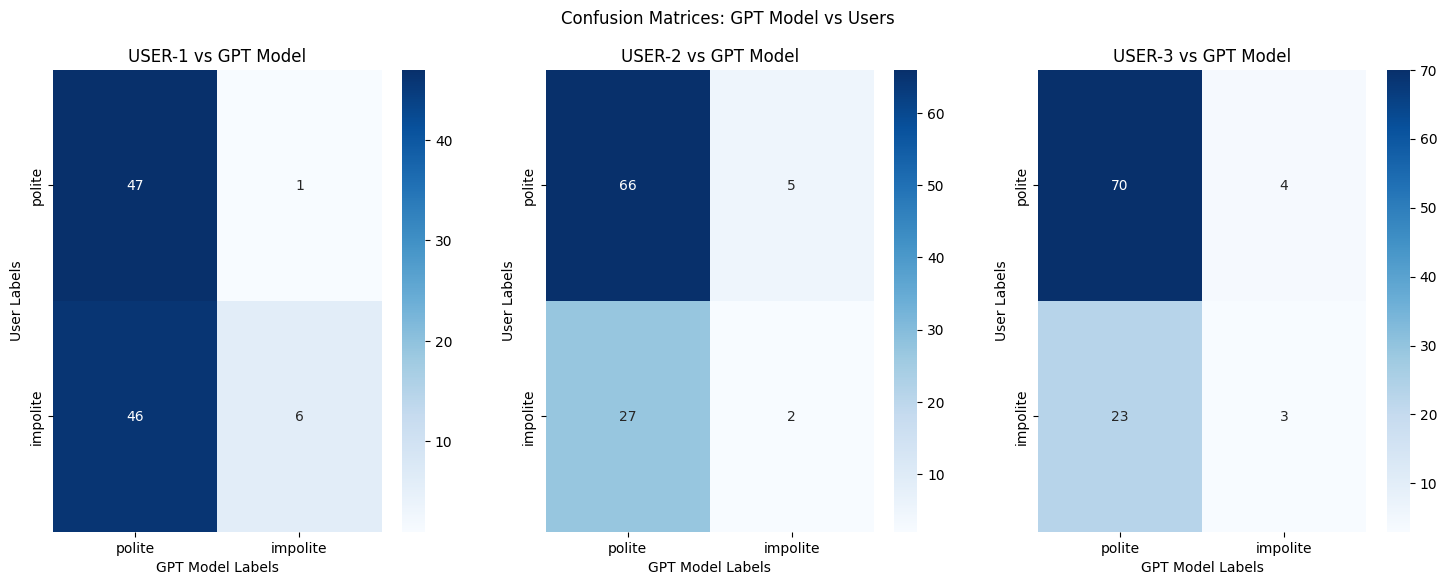

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Confusion Matrices: GPT Model vs Users')
for i, user in enumerate(users):
    cm = confusion_matrix(df[user], df['GPT response'], labels=['polite', 'impolite'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], xticklabels=['polite', 'impolite'], yticklabels=['polite', 'impolite'])
    axes[i].set_title(f'{user} vs GPT Model')
    axes[i].set_xlabel('GPT Model Labels')
    axes[i].set_ylabel('User Labels')

plt.show()


E.Cohen's Kappa

In [ ]:
gpt_kappa_scores = {}

for user in users:
    kappa = cohen_kappa_score(df[user], df['GPT response'])
    gpt_kappa_scores[user] = kappa

gpt_kappa_scores


{'USER-1': 0.09126063418406805,
 'USER-2': -0.0018785222291797243,
 'USER-3': 0.0803814713896458}

F. Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
performance_metrics = {}
user_columns = ['USER-1', 'USER-2', 'USER-3']
for user in user_columns:
    print(f"*************Results for performance metrics for {user} and GPT****************")


    conf_matrix = confusion_matrix(df[user], df['GPT response'])


    TN, FP, FN, TP = conf_matrix.ravel()


    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)


    performance_metrics[user] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print("\n")
performance_metrics_df = pd.DataFrame(performance_metrics).T
print("*************Summary of Performance Metrics****************")
print(performance_metrics_df)


*************Results for performance metrics for USER-1 and GPT****************
Accuracy: 0.53
Precision: 0.51
Recall: 0.98
F1 Score: 0.67


*************Results for performance metrics for USER-2 and GPT****************
Accuracy: 0.68
Precision: 0.71
Recall: 0.93
F1 Score: 0.80


*************Results for performance metrics for USER-3 and GPT****************
Accuracy: 0.73
Precision: 0.75
Recall: 0.95
F1 Score: 0.84


*************Summary of Performance Metrics****************
        Accuracy  Precision    Recall  F1 Score
USER-1      0.53   0.505376  0.979167  0.666667
USER-2      0.68   0.709677  0.929577  0.804878
USER-3      0.73   0.752688  0.945946  0.838323


G. Visualisation of Performance Metrics

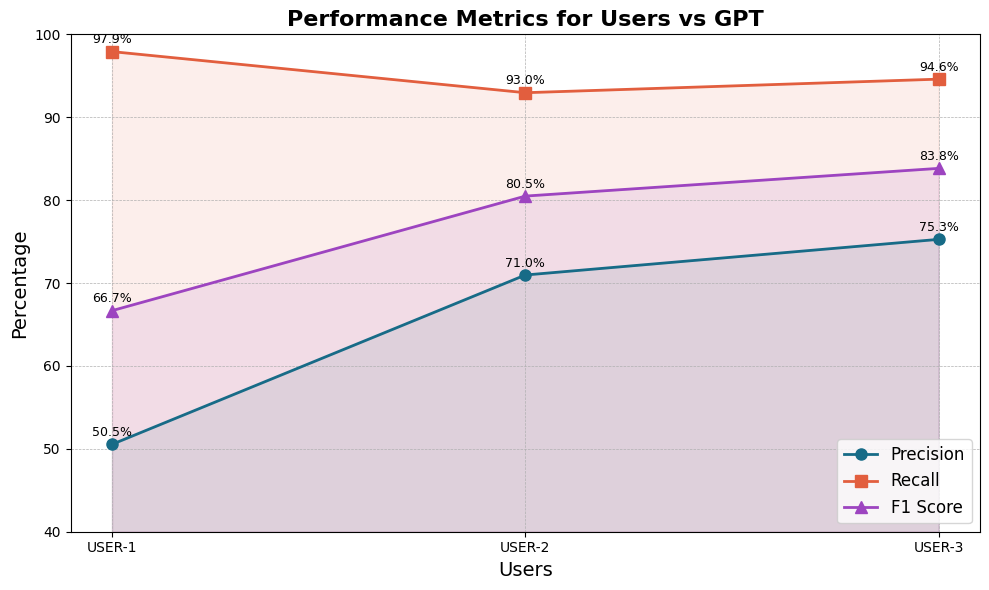

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
users = ['USER-1', 'USER-2', 'USER-3']
precision = [0.505376, 0.709677, 0.752688]
recall = [0.979167, 0.929577, 0.945946]
f1_score = [0.666667, 0.804878, 0.838323]

precision = [x * 100 for x in precision]
recall = [x * 100 for x in recall]
f1_score = [x * 100 for x in f1_score]

def plot_metric(ax, x, y, color, marker, label):
    ax.plot(x, y, color=color, marker=marker, linestyle='-', linewidth=2, markersize=8, label=label)
    ax.fill_between(x, y, 40, color=color, alpha=0.1)
    for i, val in enumerate(y):
        ax.annotate(f"{val:.1f}%", (x[i], val + 1), fontsize=9, ha='center')


colors = ['#176B87', '#E25E3E', '#9D44C0']


fig, ax = plt.subplots(figsize=(10, 6))


plot_metric(ax, users, precision, colors[0], 'o', 'Precision')
plot_metric(ax, users, recall, colors[1], 's', 'Recall')
plot_metric(ax, users, f1_score, colors[2], '^', 'F1 Score')


plt.title("Performance Metrics for Users vs GPT", fontsize=16, fontweight='bold')
plt.xlabel("Users", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.ylim(40, 100)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# *3. Comparison of GPT vs Benchmark *

In [ ]:
import pandas as pd
df= pd.read_csv("/content/DATA_RESULTS.csv", encoding='latin1')


A. Distribution of Responses

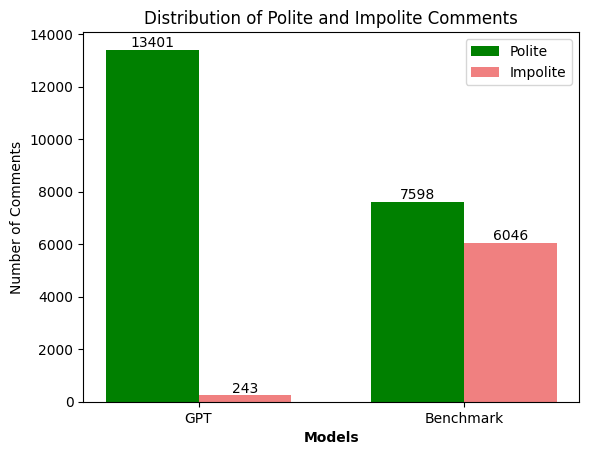

In [ ]:
import matplotlib.pyplot as plt
labels = ['GPT', 'Benchmark']
polite_counts = [13401, 7598]
impolite_counts = [243, 6046]
colors_polite = 'green'
colors_impolite = 'lightcoral'
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(labels))
r2 = [x + barWidth for x in r1]

plt.bar(r1, polite_counts, width=barWidth, color=colors_polite, label='Polite')
plt.bar(r2, impolite_counts, width=barWidth, color=colors_impolite, label='Impolite')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Number of Comments')
plt.title('Distribution of Polite and Impolite Comments')
plt.xticks([r + barWidth / 2 for r in range(len(labels))], labels)
for i, value in enumerate(polite_counts):
    plt.text(i, value, str(value), ha='center', va='bottom', color='black')
for i, value in enumerate(impolite_counts):
    plt.text(i + barWidth, value, str(value), ha='center', va='bottom', color='black')
plt.legend()
plt.show()


B. Chi-sqaure Test

In [ ]:
from scipy.stats import chi2_contingency
contingency_table_gpt_vs_benchmark = pd.crosstab(df['Benchmark_results_of_politeness'], df['GPT_response_of_POLITENESS'])
chi2, p_value, _, _ = chi2_contingency(contingency_table_gpt_vs_benchmark)
chi_square_result_gpt_vs_benchmark = {
    'Chi-Square Statistic': chi2,
    'p-value': p_value
}
chi_square_result_gpt_vs_benchmark


{'Chi-Square Statistic': 108.17925415681218, 'p-value': 2.4553630903874272e-25}

C.Confusion Matrix

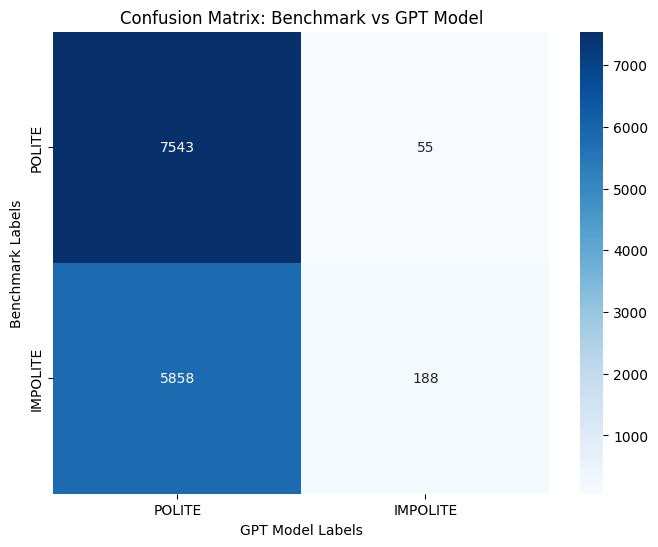

array([[7543,   55],
       [5858,  188]])

In [ ]:

df['GPT_response_of_POLITENESS'] = df['GPT_response_of_POLITENESS'].str.strip()
import seaborn as sns

cm_benchmark_vs_gpt_corrected = confusion_matrix(df['Benchmark_results_of_politeness'], df_new['GPT_response_of_POLITENESS'], labels=['POLITE', 'IMPOLITE'])


plt.figure(figsize=(8, 6))
sns.heatmap(cm_benchmark_vs_gpt_corrected, annot=True, fmt='d', cmap='Blues', xticklabels=['POLITE', 'IMPOLITE'], yticklabels=['POLITE', 'IMPOLITE'])
plt.title('Confusion Matrix: Benchmark vs GPT Model')
plt.xlabel('GPT Model Labels')
plt.ylabel('Benchmark Labels')
plt.show()

# Return the confusion matrix for further reference
cm_benchmark_vs_gpt_corrected


The overall accuracy is around 56.7%, which suggests that in over half of the cases, the GPT model's politeness categorization aligns with the results from the actual responses which is benchmark.

High Precision: The precision of 65.6% indicates that of the comments GPT classified as 'POLITE' or 'IMPOLITE', a good majority were correctly identified when compared to the previous paper's classification.This suggests that GPT is relatively reliable when it makes a politeness categorization.

The recall of 56.7% it means that 43.3% of the comments that were labeled as 'POLITE' or 'IMPOLITE' by the previous paper were not identified correctly by the GPT model.

The F1-score is a balance between precision and recall, and at 42.7%,
GPt model can be improved in making the model's results align better with the previous paper's results.

D. Performance Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


performance_metrics = {}


performance_metrics['Precision'] = precision_score(df['Benchmark_results_of_politeness'], df['GPT_response_of_POLITENESS'], labels=['POLITE'], average=None)
performance_metrics['Recall'] = recall_score(df['Benchmark_results_of_politeness'], df['GPT_response_of_POLITENESS'], labels=['POLITE'], average=None, zero_division=0)
performance_metrics['F1-Score'] = f1_score(df['Benchmark_results_of_politeness'], df['GPT_response_of_POLITENESS'], labels=['POLITE'], average=None)


performance_metrics = {key: value * 100 for key, value in performance_metrics.items()}

performance_metrics


{'Precision': array([56.28358209]),
 'Recall': array([99.26296394]),
 'F1-Score': array([71.8354129])}

E. Cohen's Kappa

In [ ]:
from sklearn.metrics import cohen_kappa_score
kappa_score = cohen_kappa_score(df['Benchmark_results_of_politeness'], df['GPT_response_of_POLITENESS'])
kappa_score_percent = kappa_score * 100
kappa_score_percent


2.6448905474149798

F. Classification Report

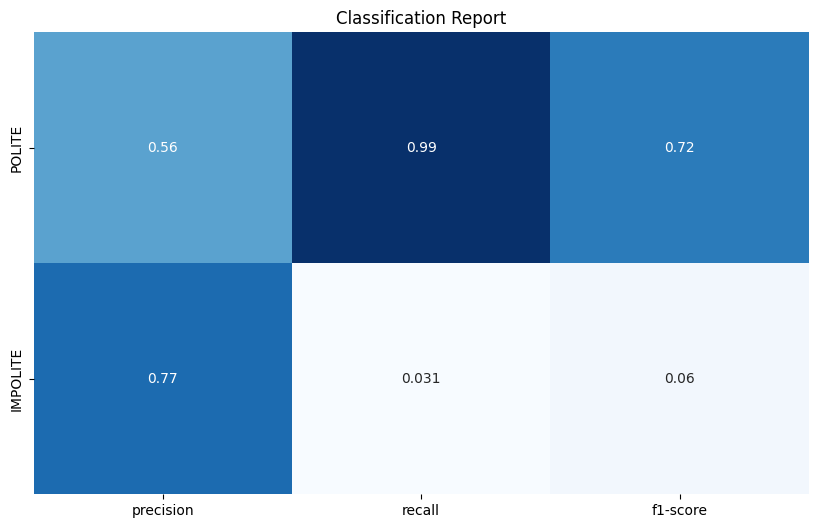

,precision,recall,f1-score,support
POLITE,0.562836,0.992630,0.718354,7598.0
IMPOLITE,0.773663,0.031095,0.059787,6046.0
micro avg,0.566591,0.566549,0.566570,13644.0
macro avg,0.668249,0.511862,0.389071,13644.0
weighted avg,0.656258,0.566549,0.426526,13644.0


In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

class_report = classification_report(df['Actual_results_of_politeness'], df['GPT_response_of_POLITENESS'],
                                     labels=['POLITE', 'IMPOLITE'], output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_metrics = class_report_df.drop('support', axis=1).iloc[:-3, :]
plt.figure(figsize=(10, 6))
sns.heatmap(class_report_metrics, annot=True, cmap='Blues', cbar=False, fmt='.2g')
plt.title('Classification Report')
plt.show()
class_report_df


G. Analysisng the Different Responses between GPT and Benchmark

In [ ]:
import pandas as pd
import random
if 'Unnamed: 8' in df.columns:
    df.drop('Unnamed: 8', axis=1, inplace=True)
false_positives = df[(df['Actual_results_of_politeness'] == 'IMPOLITE') & (df['GPT_response_of_POLITENESS'] == 'POLITE')]
false_negatives = df[(df['Actual_results_of_politeness'] == 'POLITE') & (df['GPT_response_of_POLITENESS'] == 'IMPOLITE')]
random.seed(0)
sample_fp = false_positives.sample(min(5, len(false_positives)))
sample_fn = false_negatives.sample(min(5, len(false_negatives)))

sample_fp, sample_fn



(                                                Comment  \
 531   {quote}\r\nWhat about using multiple ZK cluste...   
 2612                              Canceling last patch.   
 3620  fixed license on oen of the files... \r\nand f...   
 668   * removed accidentally introduced tab characte...   
 3018         Committed to 3.4.6 and trunk. Thanks Nick.   
 
      Actual_results_of_politeness  Actual_results_o f_sentiment  \
 531                      IMPOLITE                        -0.150   
 2612                     IMPOLITE                         0.000   
 3620                     IMPOLITE                         0.100   
 668                      IMPOLITE                        -0.125   
 3018                     IMPOLITE                         0.200   
 
      GPT_response_of_POLITENESS      Confidence_level  \
 531                      POLITE   confidence level: 1   
 2612                     POLITE   confidence level: 1   
 3620                     POLITE   confidence level: 1

Observations
Ambiguity in Language: Some comments are ambiguous and could be interpreted as either polite or impolite depending on the context, which the GPT model might not fully capture.

Informality vs. Impoliteness: The GPT model seems to consider informal language as impolite, which may not always be the case.

Lack of Context: Comments like "+1 on Mahadev's doc request" are labeled as 'POLITE' by GPT possibly because they show agreement, but the actual label is 'IMPOLITE', suggesting that additional contextual information might be needed to assess politeness accurately.

Emotional Expressions: Comments that express frustration or confusion are often labeled as 'IMPOLITE' by the GPT model, even if they were considered 'POLITE' in the previous paper.

# RQ2. TO ANALYSE THE PERFORMANCE OF GPT IN SENTIMENT ANALYSIS

In [ ]:
import pandas as pd
try:
    data_df = pd.read_csv('/content/DATA_RESULTS.csv', encoding='latin')
except Exception as e:
    data_df = str(e)
data_df.head() if isinstance(data_df, pd.DataFrame) else data_df


,Comment,Benchmark_results_of_politeness,Benchmark_results_of_sentiment,GPT_response_of_POLITENESS,Confidence_level,Reasoning_for_politeness,GPT_response_of_sentiment,GPT_reason_for_sentiment
0,"\r\n\r\nbq. On 2011-05-20 04:15:05, Benjamin ...",POLITE,-0.0216,POLITE,confidence_level: 1,reasoning: the developer is responding to the...,sentiment: 0,reason: the comment is neutral in sentiment a...
1,"\r\n\r\nbq. On 2011-05-21 02:00:22, Ted Dunni...",POLITE,0.1525,POLITE,confidence level: 1,reasoning: marshall is asking a polite questi...,sentiment: 0,reason: the comment does not express a sentime...
2,"\r\n\r\nbq. On 2011-07-07 23:34:13, Camille F...",POLITE,0.3207,POLITE,confidence level: 1,reasoning: patrick is responding to camille's...,sentiment: 0.5,reason: patrick's comment is generally positiv...
3,"\r\n\r\nbq. On 2011-07-07 23:40:32, Patrick H...",POLITE,-0.1500,POLITE,confidence level: 1,reasoning: the comment is written in a polite...,sentiment: 0,reason: the text is a technical discussion abo...
4,"\r\n\r\nbq. On 2011-07-07 23:40:32, Patrick H...",POLITE,0.1114,POLITE,confidence level: 1,reasoning: the developer is responding to the...,sentiment: 0,reason: patrick hunt is providing constructiv...


Normalising the GPT responses as it contains "sentiment word" which makes easy to compare with benchmark responses

In [ ]:
data_df['GPT_response_of_sentiment'] = data_df['GPT_response_of_sentiment'].str.replace('sentiment: ', '', regex=False)

data_df

,Comment,Benchmark_results_of_politeness,Benchmark_results_of_sentiment,GPT_response_of_POLITENESS,Confidence_level,Reasoning_for_politeness,GPT_response_of_sentiment,GPT_reason_for_sentiment
0,"\r\n\r\nbq. On 2011-05-20 04:15:05, Benjamin ...",POLITE,-0.0216,POLITE,confidence_level: 1,reasoning: the developer is responding to the...,0,reason: the comment is neutral in sentiment a...
1,"\r\n\r\nbq. On 2011-05-21 02:00:22, Ted Dunni...",POLITE,0.1525,POLITE,confidence level: 1,reasoning: marshall is asking a polite questi...,0,reason: the comment does not express a sentime...
2,"\r\n\r\nbq. On 2011-07-07 23:34:13, Camille F...",POLITE,0.3207,POLITE,confidence level: 1,reasoning: patrick is responding to camille's...,0.5,reason: patrick's comment is generally positiv...
3,"\r\n\r\nbq. On 2011-07-07 23:40:32, Patrick H...",POLITE,-0.1500,POLITE,confidence level: 1,reasoning: the comment is written in a polite...,0,reason: the text is a technical discussion abo...
4,"\r\n\r\nbq. On 2011-07-07 23:40:32, Patrick H...",POLITE,0.1114,POLITE,confidence level: 1,reasoning: the developer is responding to the...,0,reason: patrick hunt is providing constructiv...
...,...,...,...,...,...,...,...,...
13639,Excuse me? It is concise and reproduceable and...,POLITE,0.0250,POLITE,confidence level: 1,reasoning: the comment is polite in nature as ...,0,reason: the comment is neutral in sentiment as...
13640,I've created the following pull request:\r\n\r...,IMPOLITE,0.0000,POLITE,confidence level: 1,reasoning: the comment is written in a polite...,0,reason: the comment does not express any sent...
13641,Got it -- thanks for the PR!,POLITE,0.2500,POLITE,confidence level: 1,reasoning: the comment expresses gratitude and...,0.7,reason: the comment expresses gratitude and ap...
13642,Thanks for the patch...,IMPOLITE,0.2000,POLITE,confidence level: 1,reasoning: the comment expresses gratitude tow...,0.5,reason: the comment expresses gratitude and a...


1. Analysing the Distribution of Scores

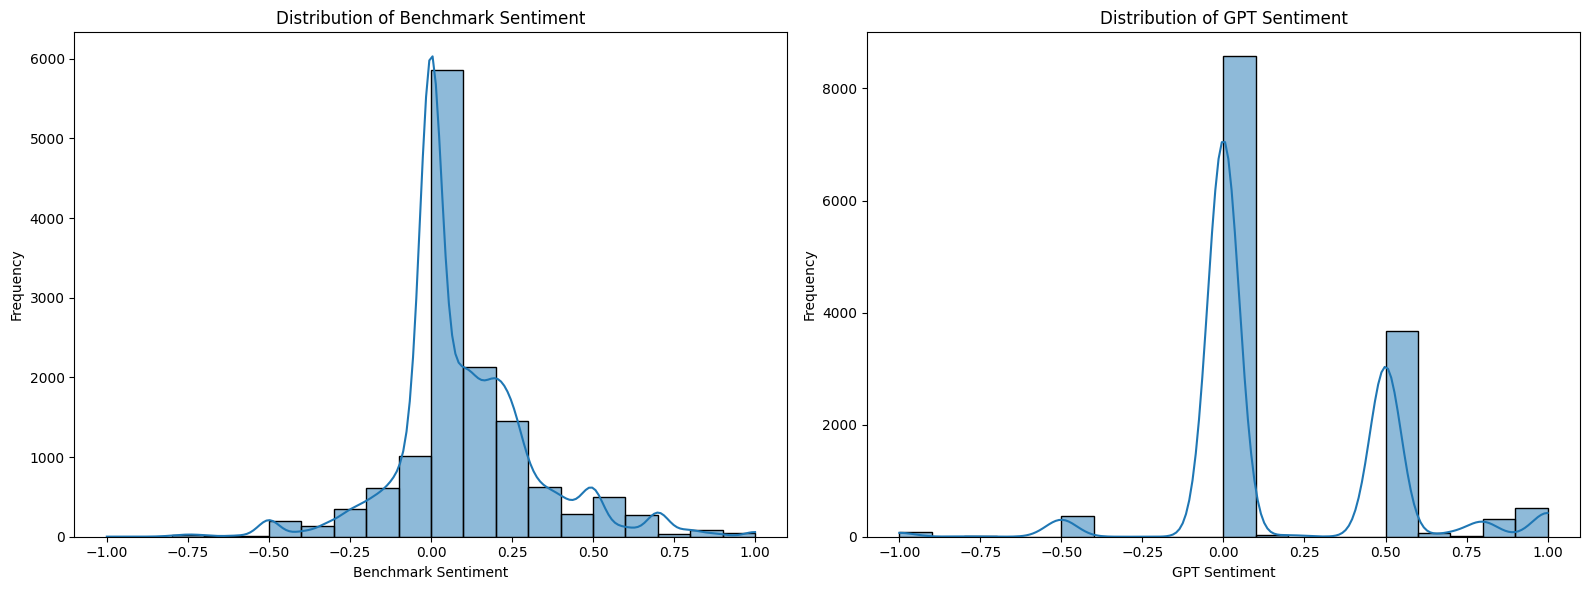

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_df['Benchmark_results_of_sentiment'] = pd.to_numeric(data_df['Benchmark_results_of_sentiment'], errors='coerce')
data_df['GPT_numeric_sentiment'] = data_df['GPT_response_of_sentiment'].str.extract('([-+]?[0-9]*\.?[0-9]+)').astype(float)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data_df['Benchmark_results_of_sentiment'], bins=20, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Benchmark Sentiment')
axes[0].set_xlabel('Benchmark Sentiment')
axes[0].set_ylabel('Frequency')

sns.histplot(data_df['GPT_numeric_sentiment'], bins=20, ax=axes[1], kde=True)
axes[1].set_title('Distribution of GPT Sentiment')
axes[1].set_xlabel('GPT Sentiment')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


2. Categorisation - Assiging bins to make comparisions easier

In [ ]:

import numpy as np

bins = [-np.inf, -0.875, -0.625, -0.375, -0.125, 0.125, 0.375, 0.625, 0.875, np.inf]
labels = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
data_df['GPT_response_of_sentiment'] = pd.to_numeric(data_df['GPT_response_of_sentiment'], errors='coerce')
data_df['Benchmark_results_of_sentiment'] = pd.to_numeric(data_df['Benchmark_results_of_sentiment'], errors='coerce')
data_df['GPT_response_of_sentiment_cat'] = pd.cut(data_df['GPT_response_of_sentiment'], bins=bins, labels=labels)
data_df['Benchmark_results_of_sentiment_cat'] = pd.cut(data_df['Benchmark_results_of_sentiment'], bins=bins, labels=labels)
data_df[['GPT_response_of_sentiment', 'GPT_response_of_sentiment_cat', 'Benchmark_results_of_sentiment', 'Benchmark_results_of_sentiment_cat']].head()


,GPT_response_of_sentiment,GPT_response_of_sentiment_cat,Benchmark_results_of_sentiment,Benchmark_results_of_sentiment_cat
0,0.0,0.0,-0.0216,0.00
1,0.0,0.0,0.1525,0.25
2,0.5,0.5,0.3207,0.25
3,0.0,0.0,-0.1500,-0.25
4,0.0,0.0,0.1114,0.00


In [ ]:
import numpy as np

bins = [-np.inf, -0.875, -0.625, -0.375, -0.125, 0.125, 0.375, 0.625, 0.875, np.inf]
labels = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
data_df['GPT_response_of_sentiment'] = pd.to_numeric(data_df['GPT_response_of_sentiment'], errors='coerce')
data_df['Benchmark_results_of_sentiment'] = pd.to_numeric(data_df['Benchmark_results_of_sentiment'], errors='coerce')

data_df['GPT_response_of_sentiment_cat'] = pd.cut(data_df['GPT_response_of_sentiment'], bins=bins, labels=labels)
data_df['Benchmark_results_of_sentiment_cat'] = pd.cut(data_df['Benchmark_results_of_sentiment'], bins=bins, labels=labels)

data_df[['GPT_response_of_sentiment', 'GPT_response_of_sentiment_cat', 'Benchmark_results_of_sentiment', 'Benchmark_results_of_sentiment_cat']].head()


,GPT_response_of_sentiment,GPT_response_of_sentiment_cat,Benchmark_results_of_sentiment,Benchmark_results_of_sentiment_cat
0,0.0,0.0,-0.0216,0.00
1,0.0,0.0,0.1525,0.25
2,0.5,0.5,0.3207,0.25
3,0.0,0.0,-0.1500,-0.25
4,0.0,0.0,0.1114,0.00


In [ ]:
data_df.GPT_response_of_sentiment_cat


/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0        0.00
1        0.00
2        0.50
3        0.00
4        0.00
         ... 
13639    0.00
13640    0.00
13641    0.75
13642    0.50
13643    0.75
Name: GPT_response_of_sentiment_cat, Length: 13644, dtype: category
Categories (9, float64): [-1.00 < -0.75 < -0.50 < -0.25 ... 0.25 < 0.50 < 0.75 < 1.00]

Visualisation of Distribution of scores

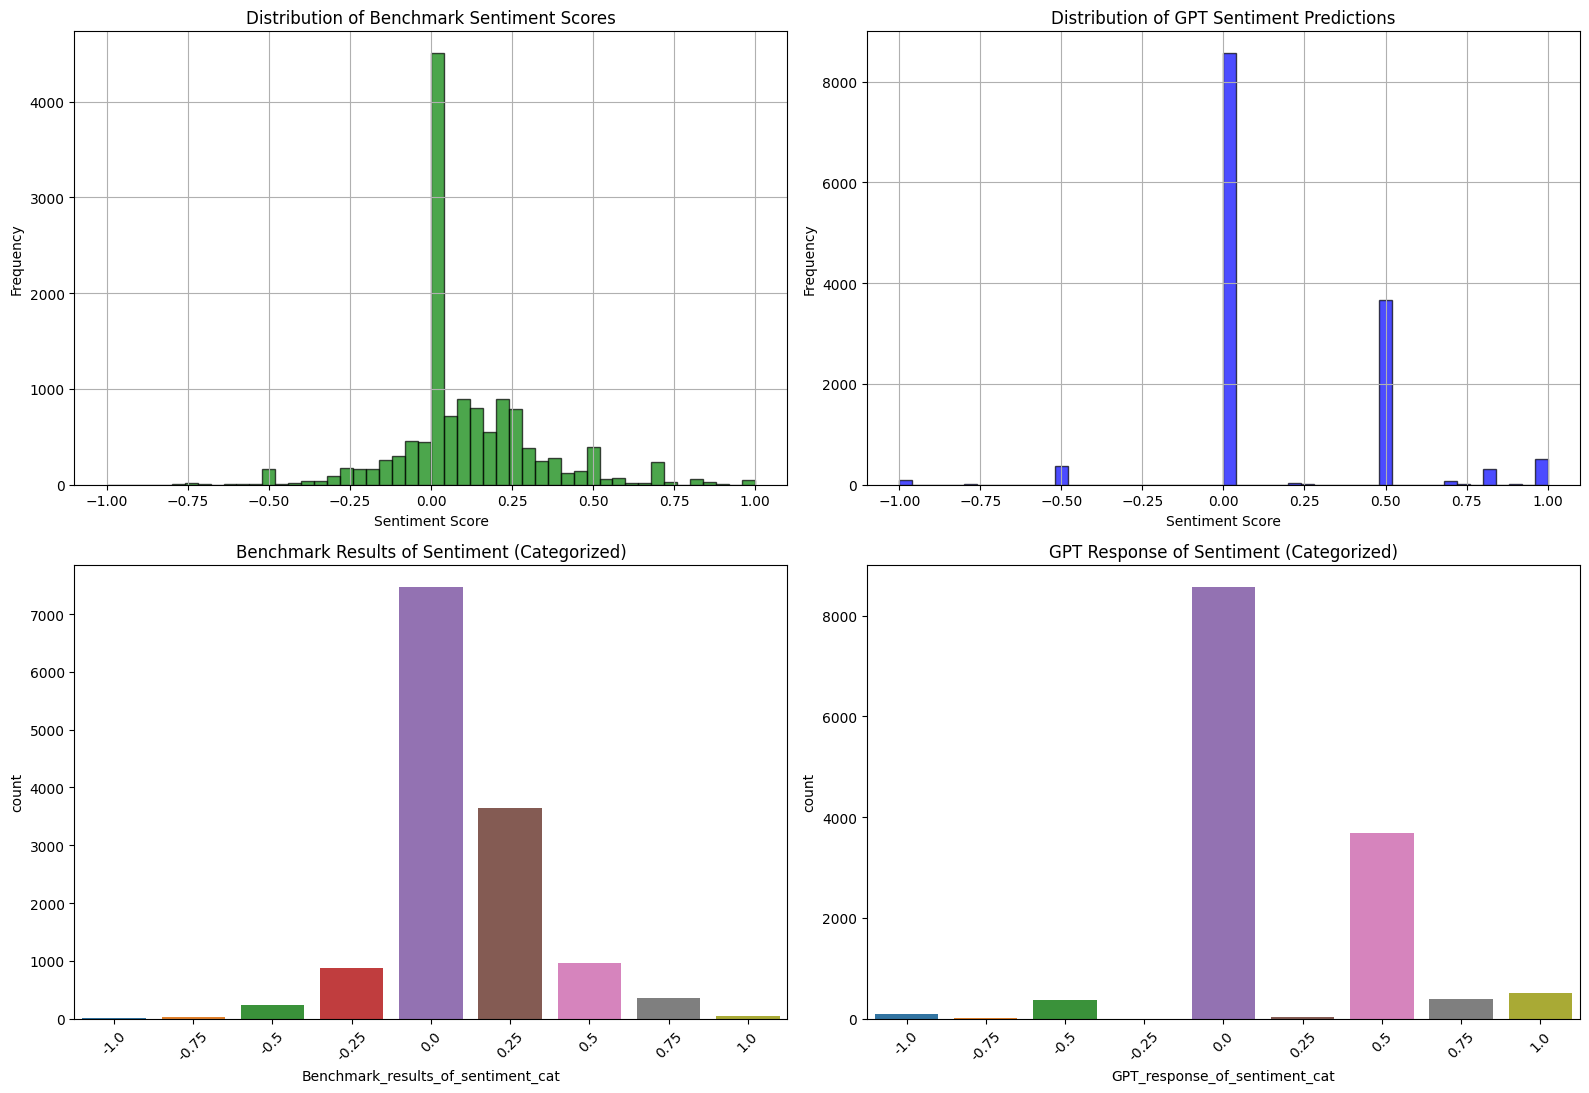

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))


ax[0, 0].hist(data_df['Benchmark_results_of_sentiment'].dropna(), bins=50, color='green', edgecolor='black', alpha=0.7)
ax[0, 0].set_title('Distribution of Benchmark Sentiment Scores')
ax[0, 0].set_xlabel('Sentiment Score')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].grid(True)


ax[0, 1].hist(data_df['GPT_response_of_sentiment'].dropna(), bins=50, color='blue', edgecolor='black', alpha=0.7)
ax[0, 1].set_title('Distribution of GPT Sentiment Predictions')
ax[0, 1].set_xlabel('Sentiment Score')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].grid(True)


sns.countplot(data=data_df, x='Benchmark_results_of_sentiment_cat', ax=ax[1, 0])
ax[1, 0].set_title('Benchmark Results of Sentiment (Categorized)')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)


sns.countplot(data=data_df, x='GPT_response_of_sentiment_cat', ax=ax[1, 1])
ax[1, 1].set_title('GPT Response of Sentiment (Categorized)')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:

gpt_dtype = data_df['GPT_response_of_sentiment_cat'].dtype
actual_dtype = data_df['Benchmark_results_of_sentiment_cat'].dtype

gpt_unique_values = data_df['GPT_response_of_sentiment_cat'].unique()
actual_unique_values = data_df['Benchmark_results_of_sentiment_cat'].unique()

gpt_dtype, actual_dtype, gpt_unique_values, actual_unique_values


/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


(CategoricalDtype(categories=[-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0], ordered=True),
 CategoricalDtype(categories=[-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0], ordered=True),
 [0.00, 0.50, 1.00, 0.75, -0.50, -1.00, 0.25, -0.75]
 Categories (9, float64): [-1.00 < -0.75 < -0.50 < -0.25 ... 0.25 < 0.50 < 0.75 < 1.00],
 [0.00, 0.25, -0.25, 0.50, -0.50, -0.75, 0.75, 1.00, -1.00]
 Categories (9, float64): [-1.00 < -0.75 < -0.50 < -0.25 ... 0.25 < 0.50 < 0.75 < 1.00])

The data types for both 'GPT_response_of_sentiment_cat' and 'Actual_results_of_sentiment_cat' columns are Categorical, which is expected. The unique values in both columns also align with the categories you specified:
−
1.0
−1.0,
−
0.75
−0.75,
−
0.5
−0.5,
−
0.25
−0.25,
0.0
0.0,
0.25
0.25,
0.5
0.5,
0.75
0.75,
1.0
1.0.



Confusion Matrix

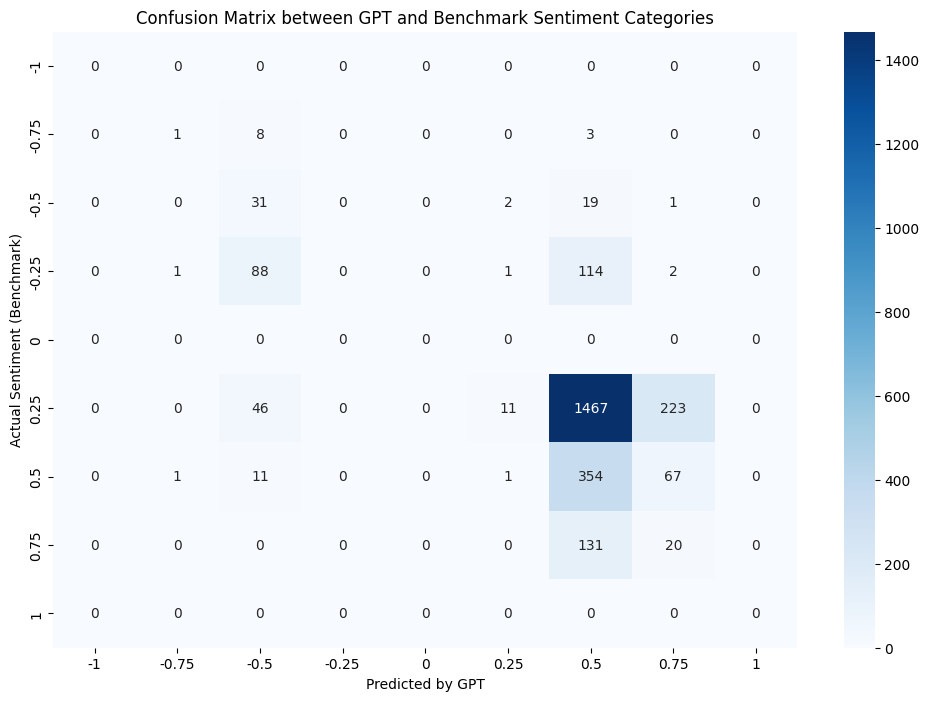

In [ ]:

from sklearn.metrics import confusion_matrix


filtered_df = data_df.dropna(subset=['GPT_response_of_sentiment_cat', 'Benchmark_results_of_sentiment_cat'])


filtered_df['GPT_response_of_sentiment_cat_str'] = filtered_df['GPT_response_of_sentiment_cat'].astype(str)
filtered_df['Benchmark_results_of_sentiment_cat_str'] = filtered_df['Benchmark_results_of_sentiment_cat'].astype(str)


cm = confusion_matrix(filtered_df['Benchmark_results_of_sentiment_cat_str'],
                      filtered_df['GPT_response_of_sentiment_cat_str'],
                      labels=[str(x) for x in labels])


plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(x) for x in labels],
            yticklabels=[str(x) for x in labels])
plt.xlabel('Predicted by GPT')
plt.ylabel('Actual Sentiment (Benchmark)')
plt.title('Confusion Matrix between GPT and Benchmark Sentiment Categories')
plt.show()


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa_score = cohen_kappa_score(y_true, y_pred)

kappa_score


0.10957652606563573

T-Test for Mean Sentiment Scores
T-Statistic:
−22.13 , P-Value: 1.34×10^−107

Chi-Squared Test for Categorical Sentiment Distribution
Chi-Squared Statistic: 19693.38, P-Value: 0.0



In [ ]:


y_true = filtered_df['Benchmark_results_of_sentiment_cat_str'].astype(str)
y_pred = filtered_df['GPT_response_of_sentiment_cat_str'].astype(str)
agreement_rate = (y_true == y_pred).mean()

agreement_rate


0.4348431545001466

In [ ]:

precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

precision, recall, f1


(0.44971010704669584, 0.4348431545001466, 0.39060799870285695)

In [ ]:

confidence_stats = data_df['Confidence_level'].describe()

confidence_stats




count                    13644
unique                       7
top        confidence level: 1
freq                     13132
Name: Confidence_level, dtype: object

In [ ]:

unique_confidence_levels = data_df['Confidence_level'].unique()
unique_confidence_levels


array([' confidence_level: 1', ' confidence level: 1',
       ' confidence level: 0.9', ' confidence level: 0.8',
       ' confidence level: 0.5', ' confidence level: 0',
       'confidence level: 1'], dtype=object)